## 1. Data Collection

### Read in the dataset

In [3]:
import pandas as pd

df = pd.read_csv('transactions.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Dataset Description

1. step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
2. type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
3. amount - amount of the transaction in local currency.
4. nameOrig - customer who started the transaction
5. oldbalanceOrg - initial balance before the transaction
6. newbalanceOrig - new balance after the transaction
7. nameDest - customer who is the recipient of the transaction
8. oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
9. newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
10. isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
11. isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## 2. Data Cleaning

#### Business logic validation

In [5]:
# Check if there are overdraft records

overdrafts = df[df['amount'] > df['oldbalanceOrg']]
overdrafts

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.00,0.00,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.0,C997608398,10845.00,157982.12,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.00,0.00,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.00,51513.44,0,0
16,1,PAYMENT,1563.82,C761750706,450.0,0.0,M1731217984,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.0,M675916850,0.00,0.00,0,0
6362317,718,CASH_OUT,317177.48,C857156502,170.0,0.0,C784108220,345042.13,662219.61,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.0,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.0,C1515639522,24893.67,211167.51,0,0


In [4]:
# Remove overdraft transaction records

df = df[df['amount'] <= df['oldbalanceOrg']]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
print("Remaining records:", len(df))
print("Remaining fraud cases:", df['isFraud'].sum())

Remaining records: 2283540
Remaining fraud cases: 8184


In [5]:
# Remove unnecessary columns

df = df.drop(columns=['isFlaggedFraud', 'oldbalanceDest', 'newbalanceDest'])

## 3. Data Analysis + Visualisation

### A. Exploratory Data Analysis (EDA)

### i. Transaction Type Analysis

In [9]:
# The distribution of transaction types:

df['type'].value_counts(normalize=True)

PAYMENT     0.459975
CASH_IN     0.403649
CASH_OUT    0.112272
DEBIT       0.012982
TRANSFER    0.011122
Name: type, dtype: float64

In [10]:
# The fraud rate by transaction type:

fraud_rate = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print(fraud_rate)

type
TRANSFER    0.161121
CASH_OUT    0.015961
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


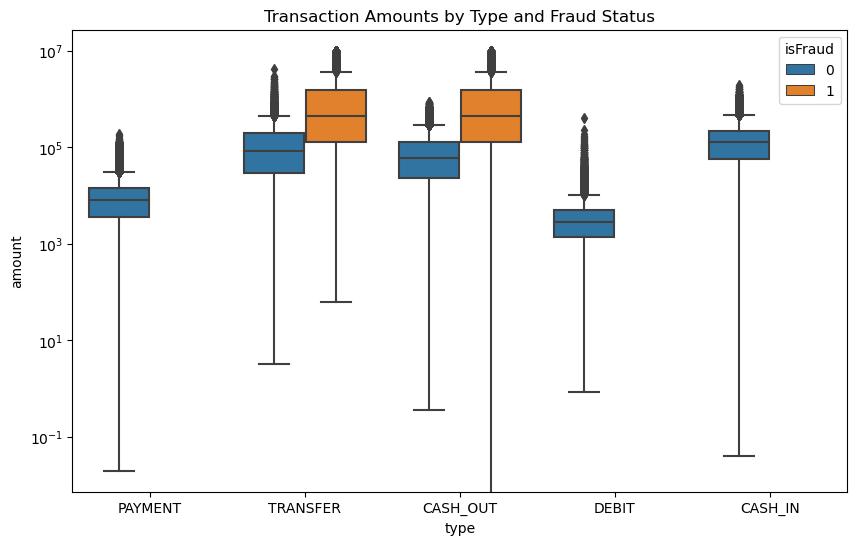

In [11]:
# The transaction amount by type (fraud vs non-fraud)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='type', y='amount', hue='isFraud')
plt.yscale('log')  # log scale since amounts are skewed
plt.title("Transaction Amounts by Type and Fraud Status")
plt.show()

In [12]:
## FYI: Summary Table

summary = df.groupby('type').agg(
    total_txn=('isFraud','count'),
    fraud_txn=('isFraud','sum'),
    fraud_rate=('isFraud','mean'),
    avg_amount=('amount','mean')
).sort_values(by='fraud_rate', ascending=False)

print(summary)

          total_txn  fraud_txn  fraud_rate     avg_amount
type                                                     
TRANSFER      25397       4092    0.161121  361411.010194
CASH_OUT     256378       4092    0.015961  111690.381104
CASH_IN      921748          0    0.000000  152817.227813
DEBIT         29646          0    0.000000    4211.549344
PAYMENT     1050371          0    0.000000   10873.663990


### ii. Amount Analysis

In [13]:
# Summary Statistics

df.groupby('isFraud')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,2275356.0,7.830542e+04,1.086676e+05,0.02,7221.6325,23331.43,1.165662e+05,4164236.3
1,8184.0,1.471923e+06,2.407459e+06,0.00,127120.8800,442290.23,1.529806e+06,10000000.0


In [14]:
# Check the skew (numerically)

from scipy.stats import skew

print("Skewness of amount:", skew(df['amount']))

Skewness of amount: 27.757642740883913


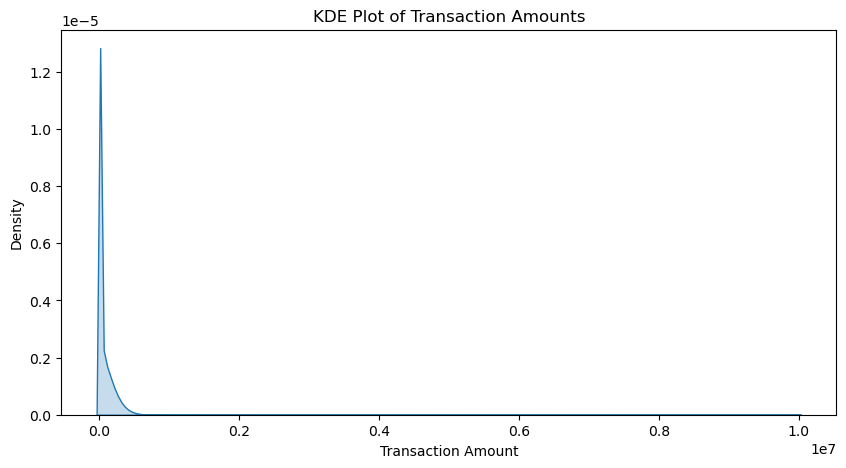

In [15]:
# Check the skew (visually)

# Kernel Density Estimation (KDE) Pot

plt.figure(figsize=(10,5))
sns.kdeplot(df['amount'], fill=True)
plt.title("KDE Plot of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

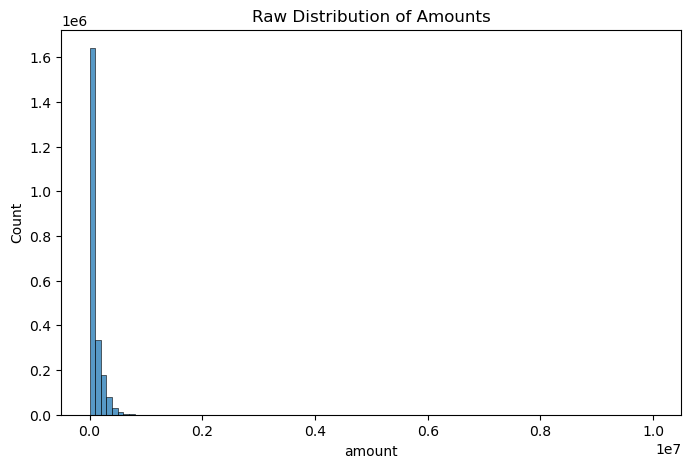

In [16]:
# Check the skew (visually)

# Bar Chart

plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=100)
plt.title("Raw Distribution of Amounts")
plt.show()

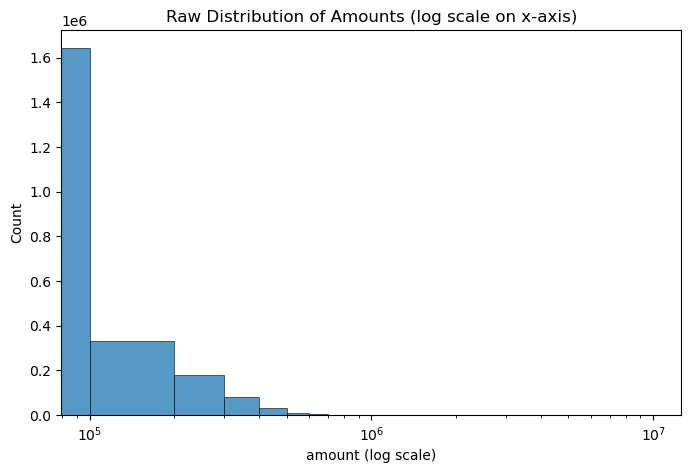

In [17]:
# A more zoomed-in version #

plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=100)
plt.xscale('log')
plt.title("Raw Distribution of Amounts (log scale on x-axis)")
plt.xlabel("amount (log scale)")
plt.show()

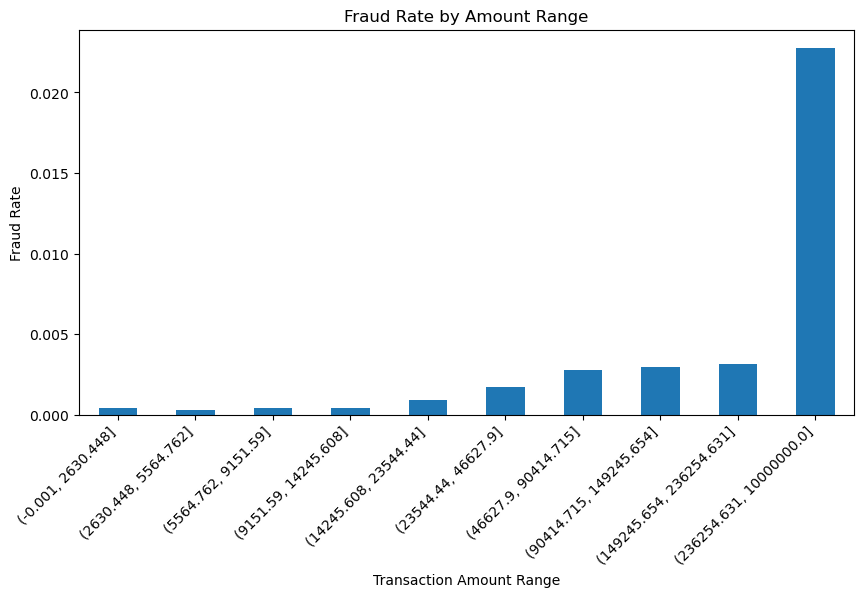

In [18]:
# Fraud Rate by Amount Range (Bar Chart)

#1. Split transaction amounts into 10 equal-sized quantile bins
fraud_by_amount = df.groupby(pd.qcut(df['amount'], q=10))['isFraud'].mean()

#2. Plot fraud rate by quantile bin
fraud_by_amount.plot(kind='bar', figsize=(10,5))
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Amount Range")
plt.title("Fraud Rate by Amount Range")
plt.xticks(rotation=45, ha='right')
plt.show()

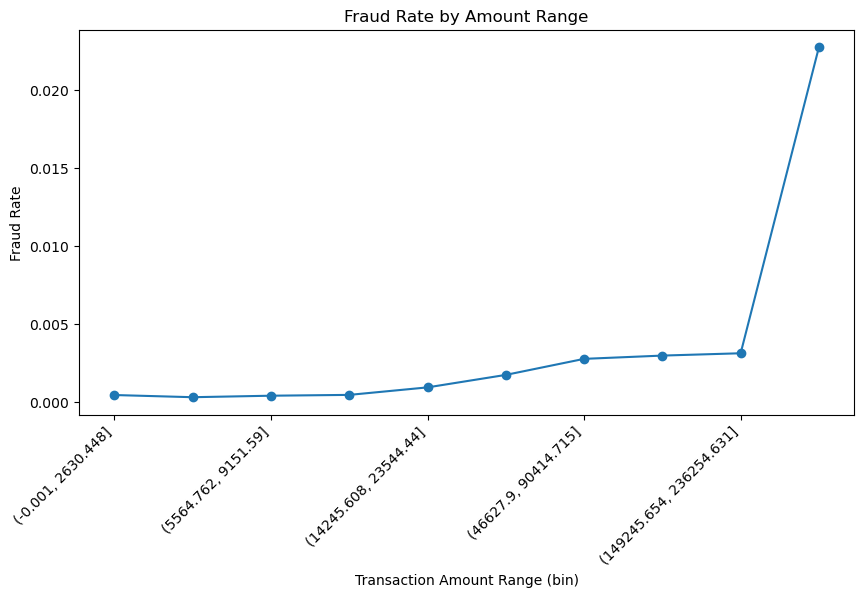

In [40]:
# Fraud Rate by Amount Range (Line Plot)

plt.figure(figsize=(10,5))
fraud_by_amount.plot(marker='o')
plt.ylabel("Fraud Rate")
plt.xlabel("Transaction Amount Range (bin)")
plt.title("Fraud Rate by Amount Range")
plt.xticks(rotation=45, ha='right')
plt.show()

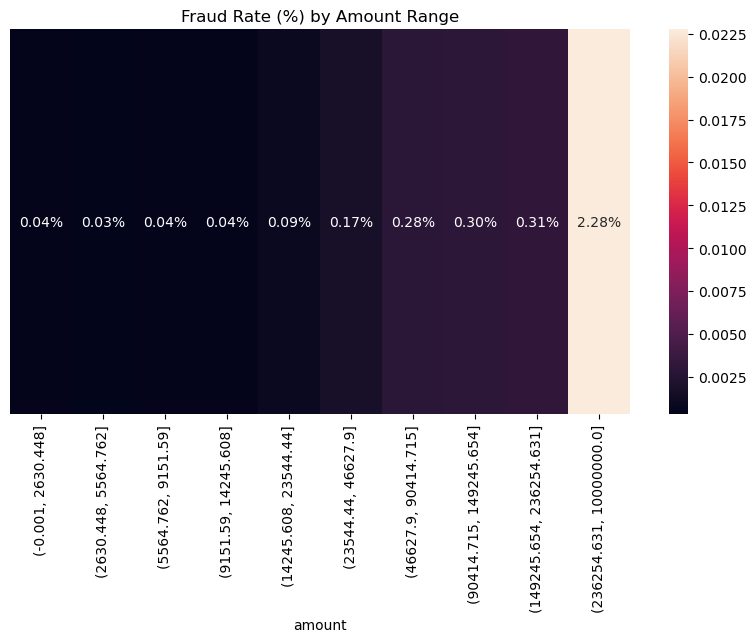

In [19]:
# Fraud Rate by Amount Range (Heatmap)

plt.figure(figsize=(10,5))
sns.heatmap(fraud_by_amount.to_frame().T, annot=True, fmt=".2%")
plt.title("Fraud Rate (%) by Amount Range")
plt.yticks([])
plt.show()

### B. Feature Engineering

i. Encoding

ii. Correlation Analysis (EDA)

iii. Create new features - from raw data

### i. Encoding

In [6]:
# Encode categorical feature

df = pd.get_dummies(df, columns=['type'], prefix='type')
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,1,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,1,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,1,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,1,0,0,0,0,1


### ii. Correlation Analysis (EDA)

step              0.052662
amount            0.419182
oldbalanceOrg    -0.008566
newbalanceOrig   -0.028415
type_CASH_IN     -0.049341
type_CASH_OUT     0.073656
type_DEBIT       -0.006878
type_PAYMENT     -0.055350
type_TRANSFER     0.279576
Name: isFraud, dtype: float64


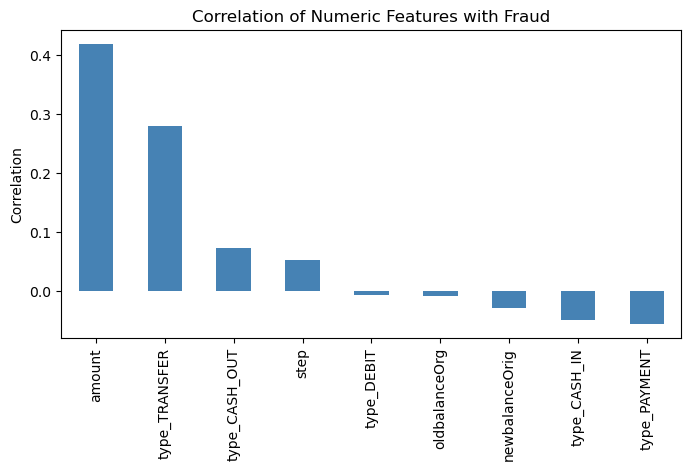

In [21]:
# Numeric correlations with fraud
corrs = df.corr(numeric_only=True)['isFraud'].drop('isFraud')
print(corrs)

# Quick bar plot
corrs.sort_values(ascending=False).plot(kind='bar', figsize=(8,4), color='steelblue')
plt.title("Correlation of Numeric Features with Fraud")
plt.ylabel("Correlation")
plt.show()

### iii. Creating new features from raw data

1. wallet_ratio 
2. hour_of_day
3. receiver_freq
4. sender_freq
5. is_merchant

In [7]:
# Feature 1: Wallet Ratio
df['wallet_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)

# Feature 2: Hour of the day
df['hour_of_day'] = df['step'] % 24

# Feature 3: Receiver Frequency (Number of times a recipient receives money in same step)
receiver_freq = df.groupby(['nameDest', 'step']).size().reset_index(name='receiver_freq')
df = df.merge(receiver_freq, on=['nameDest', 'step'], how='left')

# Feature 4: Merchant Flag (destination ID starts with 'M')
df['is_merchant'] = df['nameDest'].str.startswith('M').astype(int)

# Feature 5: Sender Frequency
sender_freq = df.groupby(['nameOrig', 'step']).size().reset_index(name='sender_freq')
df = df.merge(sender_freq, on=['nameOrig', 'step'], how='left')

df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,wallet_ratio,hour_of_day,receiver_freq,is_merchant,sender_freq
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0,0,0,0,1,0,0.057834,1,1,1,1
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0,0,0,0,1,0,0.087731,1,1,1,1
2,1,181.00,C1305486145,181.00,0.00,C553264065,1,0,0,0,0,1,0.994505,1,1,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,1,0,1,0,0,0,0.994505,1,1,0,1
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0,0,0,0,1,0,0.280788,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283535,743,339682.13,C786484425,339682.13,0.00,C776919290,1,0,1,0,0,0,0.999997,23,1,0,1
2283536,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,1,0,0,0,0,1,1.000000,23,1,0,1
2283537,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,1,0,1,0,0,0,1.000000,23,1,0,1
2283538,743,850002.52,C1685995037,850002.52,0.00,C2080388513,1,0,0,0,0,1,0.999999,23,1,0,1


In [8]:
df.to_csv("cleaned_dataset.csv", index=False)

## Machine Learning Workflow (Modelling)

i. Train your model

ii. Make predictions

iii. Assess model performance

### i. Train your model

1. Define features & target
2. Split the data
3. Handle imbalance
4. Train model

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_score
)

# 1. Define features & target 

feature_columns = [
    'wallet_ratio', 'hour_of_day', 'amount',
    'receiver_freq', 'sender_freq', 'is_merchant',
    'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'
]

X = df[feature_columns] # features
y = df['isFraud'] # target

# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=100
)

# 3. Handle imbalance
non_fraud = (y_train == 0).sum()
fraud = (y_train == 1).sum()
scale_pos_weight = (non_fraud / fraud)

# 4. Train model
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.01,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=100
)

model.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:11:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

### ii. Make predictions

In [25]:
y_pred = model.predict(X_test)

### iii. Assess model performance

1. Classification report
2. Confusion matrix

Classification Report:


,precision,recall,f1-score,support
0,0.999999,0.999481,0.999740,682607.000000
1,0.873932,0.999593,0.932548,2455.000000
accuracy,0.999482,0.999482,0.999482,0.999482
macro avg,0.936965,0.999537,0.966144,685062.000000
weighted avg,0.999547,0.999482,0.999499,685062.000000


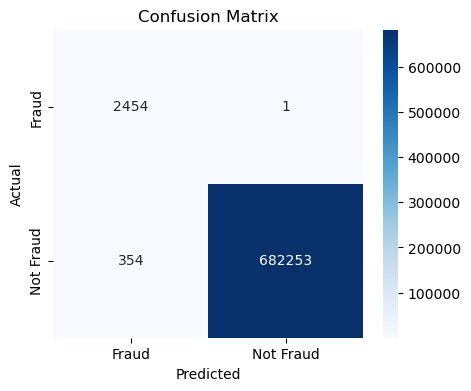

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:")
display(pd.DataFrame(report).transpose())

conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
plt.figure(figsize=(5, 4))
sns.heatmap(
    conf_matrix,
    annot=True, fmt='d', cmap='Blues',
    xticklabels=['Fraud', 'Not Fraud'],   
    yticklabels=['Fraud', 'Not Fraud']   
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [194]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

grid = GridSearchCV(model, param_grid=params, scoring='recall', cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:19:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:19:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:19:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:19:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:22:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:22:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:22:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:22:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,

Best Params: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
import joblib
joblib.dump(model, model.pkl')